In [26]:
##### Koch_alpha @ YYE
##### April 2023
### Generate Koch-like shapes' coordinates with arbitraty angles

import numpy as np
import matplotlib.pyplot as plt

In [9]:
def koch_line(start, end, alpha, direction):
    """
    Segments a line to Koch line, creating fractals.
    :param tuple start:  (x, y) coordinates of the starting point
    :param tuple end: (x, y) coordinates of the end point
    :alpha: angle for Koch triangle (unit: rad)
    :direction: 凹(+1)凸(-1), concave or convex?
    ~returns tuple: tuple of three points between the segmentation
    """
    
    x1, y1 = start[0], start[1] # coordinates of the start
    x2, y2 = end[0], end[1]     # coordinates of the end
    
    # the length of the line
    deltax, deltay = x2 - x1, y2 - y1
    l = np.sqrt((deltax)**2 + (deltay)**2)
    coef = np.sqrt( 2 * (1 - np.cos(alpha)) ) + 2
    segm = l / (coef)
    #dist = segm * coef
    beta = (np.pi - alpha)/2
    if x1==x2:
        if y1<y2:
            theta = + np.pi / 2
        if y1>y2:
            theta = - np.pi / 2
    else:
        theta = np.arctan((deltay)/(deltax))
    if x1>x2:
        theta += np.pi
    
    changex, changey = (deltax)/(coef), (deltay)/(coef)
    # second point: one third in each direction from the first point
    b = (x1+changex, y1+changey)
    # third point: rotation for multiple of 60 degrees
    degree = theta + beta * direction
    c = (b[0] + segm * np.cos(degree), b[1] + segm * np.sin(degree))
    # fourth point: two thirds in each direction from the first point
    d = (x2-changex, y2-changey)
    
    return [b, c, d]





def Koch_generate(polygon, edge, angle, concave, generation):
    
    ## General initial coordinates
    initial_shape = polygon # 3 = triangle, 4 = square, 5 = star, etc.
    edge_length = edge # Initial edge length
    angle_ini = 2.0 * np.pi / initial_shape
    coordinate = []
    #new_x, new_y = 0, 0
    ## Move the polygon center as (0,0)
    tta = np.pi * (1 - 2/polygon)
    new_x, new_y = - edge_length/2, - edge_length/2 * np.tan(tta/2)

    for i in range(initial_shape):
        coordinate.append((new_x,new_y))
        new_x += edge_length * np.cos(i * angle_ini)
        new_y += edge_length * np.sin(i * angle_ini)
    coordinate.append(coordinate[0]) # To form a circle.

    
    max_degree = generation # Define the recursion order
    degre = angle # Define the fractal angle
    direction = concave # Define 凹(concave +1) 凸(convex -1)
    for i in range(max_degree): ## Recursion Order
        num_edge = len(coordinate)
        for j in range(num_edge-1): ## How many times to insert new points?
            num_point = j * 4
            coordinate = coordinate[:num_point+1] + koch_line(coordinate[num_point],coordinate[num_point+1],degre,direction) + coordinate[num_point+1:]

    return coordinate

In [49]:
%%time
coordinate = Koch_generate(3,200,np.pi/3,-1,5)
with open('coord/file_name.txt', 'w') as f:
    for tuple in coordinate:
        f.write('%s, %s, \n' % tuple)

CPU times: user 49.2 ms, sys: 4.98 ms, total: 54.1 ms
Wall time: 50.6 ms


In [60]:
%%time
for shape in range(3,4):
    for ii in [-1,+1]:
        for g in range(8,9):
            ## chr(48~57) = 0~9 // + 48
            if ii == +1:
                chr_direction = chr(43)
            if ii == -1:
                chr_direction = chr(45)
            coordinate = Koch_generate(shape,100,np.pi/shape,ii,g)
            ## Name as: initial polygon + alpha angle + concave/convex + recursion degree. 
            filename = 'coord/'+'Koch_'+chr(shape+48)+'_π;'+chr(shape+48)+chr_direction+chr(g+48)+'.txt'
            with open(filename, 'w') as f:
                for tuple in coordinate:
                    f.write('%s, %s, \n' % tuple)
        

CPU times: user 5min 12s, sys: 6.87 s, total: 5min 18s
Wall time: 5min 20s


CPU times: user 127 ms, sys: 56.5 ms, total: 184 ms
Wall time: 183 ms


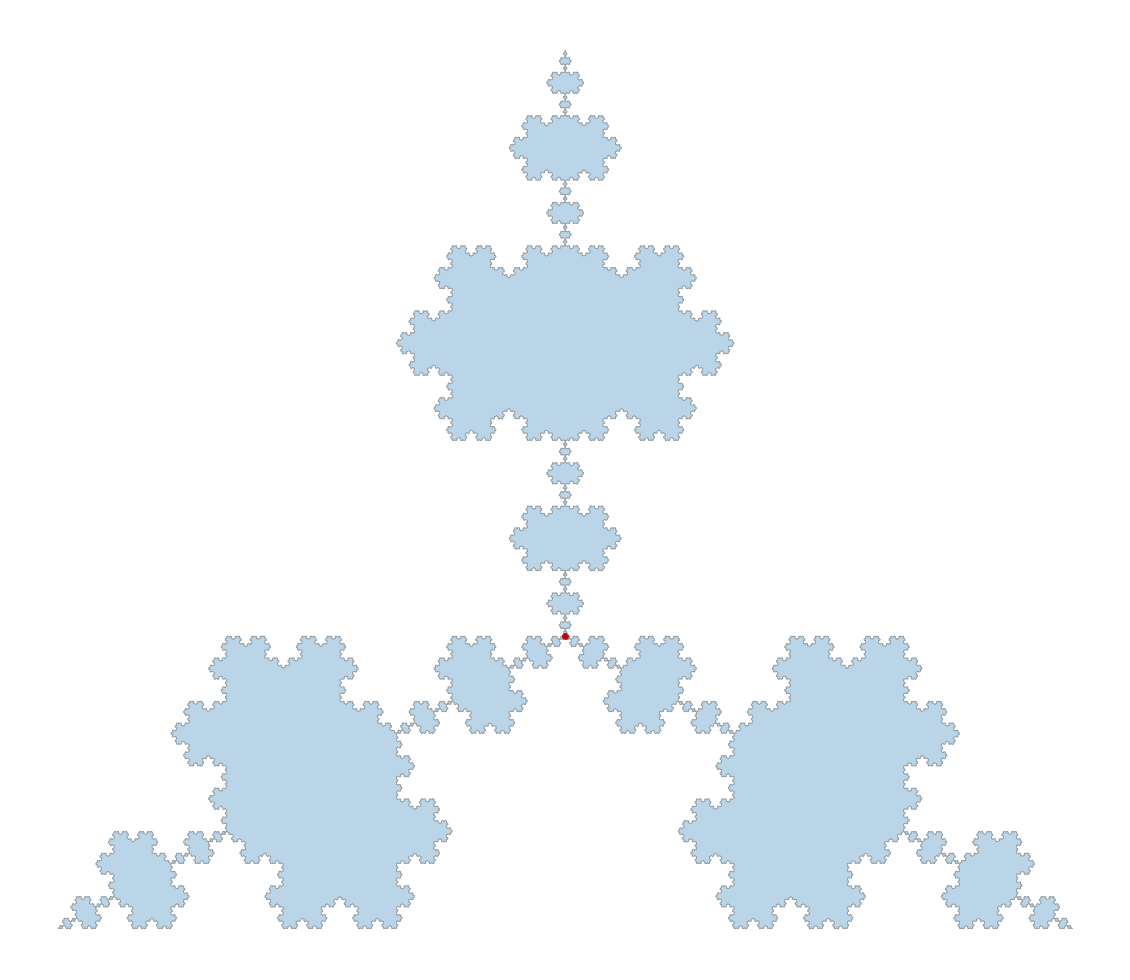

In [61]:
%%time
#coordinate = Koch_generate(3,200,np.pi/3,-1,5)

# Extract all coordinates
pos_x = []
pos_y = []
for i in range(len(coordinate)):
    pos_x.append(coordinate[i][0])
    pos_y.append(coordinate[i][1])

# fill the polygons
plt.figure(figsize=(20, 20))
plt.fill(pos_x, pos_y, edgecolor='black', lw=0.5, alpha = 0.3)
plt.scatter(0,0,color="red")
plt.axis('off')
plt.axis('scaled')
plt.show


In [ ]:
## Or we output positions inside the for loop
